In [31]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [3]:
a = np.matrix([[.333,.750,.625,.167,.167,.667,0,1.000,.375,.000,.286,.333,.500,.800,0,.500,.250,.250,1.000,.000,.000,.500,.333,.200,.800,.600,.200,.500,.333,0,.333,.600,.375,.444,.000,0,0,.000,.000,.667,.375,.333,.667,.500,.571,.500,.167,.500,.571,.400,.500,.889,1.000,.667,.400,.750,.600,.571,.333,.250,.429,.556,.000,0,0,0,0,0,0,0,.375,.500,.500,0,0,0,0,.600,1.000,.333,.429,.500],
               [.800,.000,.250,.000,.400,.000,0,0,0,1.000,.333,.500,.400,.000,.429,.333,.000,.571,.333,.000,.000,.667,.500,.667,.250,.667,.250,1.000,.500,.667,.333,.333,.000,.667,.667,.000,.750,.500,.200,.500,.400,1.000,.333,.600,.200,.333,.333,.000,.000,.000,.750,.000,.500,1.000,.286,.000,.667,.500,.333,0,.000,1.000,.500,.500,.714,.400,.600,.250,.167,.500,.500,.250,.200,1.000,.500,.500,.000,.600,.333,.333,.000,.800],
               [0,0,.667,.667,.333,.250,.000,.000,.000,0,0,.571,.000,1.000,.250,.000,.333,.000,1.000,.750,.667,1.000,.333,.556,.750,1.000,.500,.000,.429,.286,.500,.500,.500,1.000,.250,.250,.000,.250,.000,.250,.000,1.000,.750,.500,.000,0,.333,.333,1.000,.250,.167,1.000,.333,.571,.000,.500,.667,.500,.000,.500,.200,.571,.286,.800,.333,.000,.750,.800,.400,.200,.333,.200,.000,1.000,.500,.600,.500,.000,.667,.333,.167,.500],
               [0,.000,.000,.000,.667,.400,.600,.333,.333,.400,.800,.333,.000,.375,1.000,.500,.500,.333,.800,.500,.250,.500,.333,.000,.750,.000,.333,.500,.800,.556,.500,.500,.000,.600,.500,.429,.250,1.000,.000,.600,.750,.600,.333,.333,1.000,.714,.600,.000,.500,.333,.714,.375,.250,.500,.600,.200,.000,.667,.000,.400,.250,.000,.667,.667,.400,.333,.500,.000,.444,.000,.400,.250,.500,.333,.000,.500,.400,.250,.333,0,0,.000],
               [.200,.333,.333,.400,.250,.667,.750,.500,.571,.286,.667,.583,.750,.200,.750,.250,.500,.200,.300,.667,0,.455,.000,.286,.250,.500,.222,.333,.778,.750,.286,.571,0,0,.333,.167,.600,.250,.556,.500,.333,.286,.500,.333,.286,.750,.500,.600,.286,.400,.000,.167,.333,.250,.286,.625,.333,.250,.429,.400,.500,.200,.500,.400,.500,.250,.250,.400,.667,.500,.500,.800,.200,.500,0,.636,.500,.667,.625,.600,.167,.429],
               [.500,.250,.000,.000,.400,.250,.571,.222,.143,.000,.500,.400,.500,.000,.000,.000,.400,0,0,0,0,.000,.500,.667,1.000,.600,.500,.667,.500,.500,.333,.500,1.000,.333,.800,.333,.000,.667,.750,.250,.600,.600,.667,.500,.333,.500,.444,.333,.429,.333,.429,0,.250,.400,.400,.429,.500,.600,.714,.625,.286,.400,.571,.750,.000,.250,.429,.500,.000,.250,.500,.333,0,.333,1.000,0,0,0,0,0,0,0],
               [1.000,1.000,.400,.400,.500,.200,.500,.667,.000,.250,.400,.500,.250,.500,.600,.333,.250,.500,.400,.333,.200,.571,.571,1.000,.636,.500,.333,.250,.000,.286,.000,.375,.429,.333,.250,.500,.364,.273,.333,.400,.500,.667,.333,.333,.250,.500,.667,.000,.714,.500,.286,.333,.500,.000,.375,.400,.333,.333,.571,.500,.800,.333,.600,.556,.250,.000,1.000,.000,.400,.250,.400,.800,.333,.600,.250,.833,.000,.000,.500,.250,0,0],
               [.333,.500,.400,.333,.200,.250,.500,.000,0,.000,0,1.000,1.000,.500,.333,.000,.000,.500,0,0,0,0,0,0,0,0,.000,.000,.667,.000,1.000,0,.333,.333,1.000,.250,1.000,.000,0,.000,.571,.000,.333,.500,.750,.000,.333,1.000,.500,.500,.500,.250,.000,1.000,0,1.000,.750,.667,.600,.000,.600,.667,.750,.500,.500,.500,.000,.000,.667,.500,.250,.000,.429,.500,.500,.200,.667,0,0,0,0,0],
               [.167,.222,.000,.000,.500,.200,.286,.571,.750,.625,.273,.500,.500,.400,.571,.167,.444,.500,.231,.857,.571,.500,.000,.000,.333,.250,.400,.250,.333,.500,.375,.455,.714,.455,.571,.143,.333,.143,0,.800,.455,.600,.200,.778,.375,.250,.667,.333,.600,.500,.364,.667,.533,.625,0,.583,.400,.400,.333,.231,.091,.444,.250,.250,.500,0,.556,.556,.500,.467,.625,.286,.636,.417,.444,.444,.400,.500,.222,.333,.200,0],
               [.667,.400,.500,.667,.500,.571,.455,.750,.333,.286,.500,.400,0,0,0,0,0,0,0,.333,.400,.000,.667,.000,.333,.500,.167,.333,.333,.400,.333,.000,.500,.500,.000,.333,.500,.429,.857,.000,.333,.667,.200,.222,.750,.667,.000,.800,.375,.400,.143,.667,.200,.545,.200,.500,.000,.556,.667,.600,.400,.300,.571,.444,.200,.200,.250,.250,.333,1.000,.250,.250,.667,.000,.429,.500,.556,.000,.333,.500,.200,.429],
               [.600,.500,.571,.667,.000,.571,.000,.000,.250,.333,1.000,.333,.200,.400,.333,.667,.600,.333,.833,.500,.000,.286,.667,.571,.400,.167,.500,.500,.333,.714,0,.000,0,.250,.500,.333,.200,.000,.333,0,.600,.333,.600,.667,.400,.250,.000,1.000,.667,1.000,.000,.333,.000,.400,.500,.429,.286,.250,.000,.444,.167,.250,.667,.250,.714,.429,.375,.250,.286,.500,.500,.400,.333,.333,.600,0,.667,.167,.000,.333,.500,1.000],
               [.200,.200,.200,.500,.250,.300,.455,.250,.000,.500,.500,.429,.286,.429,.286,.500,1.000,.571,.667,.600,.444,.714,.500,.571,.500,.750,.286,.600,.500,.385,.417,.333,.857,.000,.500,.222,.333,.833,.429,.400,0,.375,.300,.111,.143,.400,.500,.667,.429,.364,.182,.000,.625,.308,.667,.364,.364,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,.400,.200,.444,.200],
               [.750,.250,.500,.400,.667,1.000,.500,.500,.000,0,.500,.000,.500,.250,.500,.000,.000,.000,.600,.667,.500,.000,.500,.333,.000,.500,.000,.250,.667,.400,.500,.000,.500,.000,.333,.750,.000,.000,.000,.000,.500,0,.750,.333,.000,.000,.000,.000,.500,.667,.571,.500,.750,.333,1.000,.000,.500,.000,.000,1.000,.000,0,0,0,.400,.500,.400,.400,.000,.000,.000,.333,.429,.667,.250,.250,.500,.667,.800,.500,.714,.333],
               [.300,.400,.625,.500,.333,.000,.765,.500,.538,.556,.333,.200,.091,.333,.583,.400,.500,.364,.308,.714,.286,.000,.333,.273,.400,.556,.250,.625,.444,.231,.500,.286,.500,.500,.333,.385,.385,.455,.364,.333,.417,.333,.455,.538,.333,.500,.600,0,.733,.300,.571,.250,.333,.364,.091,.250,.600,.500,.000,.222,.182,.385,.400,.222,.125,0,.385,.286,.750,.583,.333,.455,.417,.273,.500,.444,.643,.375,.667,.750,.357,0],
               [.375,.333,.500,.500,.125,.000,1.000,.500,.333,.750,.667,.250,.167,.600,.375,.500,.250,.000,.571,.429,.250,.400,.167,.500,.500,.500,.250,.200,.400,1.000,0,0,0,.286,0,0,0,0,.500,.333,.200,.333,.667,0,0,0,0,0,0,0,0,0,0,0,0,0,0,.667,.333,.429,.833,.500,.333,.250,.500,1.000,.455,.250,.667,.000,.400,.500,.200,.000,.600,.400,.250,.333,.600,.333,.667,.600],
               [.400,0,0,.333,1.000,.500,.375,.500,.500,.625,.250,.000,.667,0,0,0,.000,.500,.400,.667,0,0,.250,.000,1.000,.429,.400,.200,.400,.600,.500,.500,.571,.500,.250,.333,.000,1.000,.400,.000,.500,.000,.333,.400,.200,.000,.500,.333,.500,.333,.333,.250,.667,.364,.000,.286,.429,.000,.250,.500,.600,.500,.714,.400,.667,.667,.200,.286,.333,.000,0,1.000,.000,.500,1.000,.400,.000,.333,.333,.400,.600,.500],
               [.800,.000,.600,0,.400,.636,.200,.000,.167,.400,.778,.333,.333,.625,.429,.250,.400,.333,0,0,0,0,0,0,0,0,0,.000,.111,.375,.429,.500,.000,0,0,.750,.429,.200,.333,.250,.429,.333,.333,.400,.400,.375,.250,.375,.429,.700,.286,.200,.000,.500,.800,.667,.500,.300,.000,.556,.500,.500,.333,.600,.000,.143,.333,.625,.200,.500,.333,.125,.667,.143,.583,.333,.364,.400,0,.636,.500,.400],
               [.000,.600,.429,.625,.600,.000,.000,0,0,0,.333,.500,.000,.250,0,0,.000,.000,.667,.000,1.000,.250,.500,.000,.400,.000,.000,.833,.500,.500,.500,0,.000,0,0,.500,.000,.667,.400,.400,.200,.200,1.000,.600,.200,.333,.250,1.000,.500,.800,1.000,.778,.000,.250,.500,.000,.000,.333,.333,.400,.333,.000,.800,.400,.333,.500,0,.556,.250,.167,.400,.333,.200,.250,.250,.400,.250,.556,.000,.000,0,.500],
               [.500,.200,.000,0,0,.000,.333,.000,0,0,0,.000,1.000,0,0,.500,.500,0,0,0,0,0,0,.000,0,1.000,0,1.000,.000,1.000,.667,.000,0,.500,.500,0,0,.667,.500,.200,.500,.667,.000,.000,.000,0,0,0,.500,.500,.000,.667,.667,.500,0,.400,.000,0,.000,1.000,0,0,0,0,.500,.333,.000,.000,.500,.000,0,.500,.000,.167,.667,.000,.000,.000,1.000,.200,.333,0],
               [.400,.500,1.000,.300,.750,.000,.333,.667,0,0,0,.200,.500,1.000,.200,1.000,.333,.571,0,0,.000,.667,.000,.667,.500,.500,.500,.444,.429,.375,.714,.250,.833,.571,.800,.400,.600,.167,.500,.556,.750,.333,.500,.400,.400,.333,.167,1.000,.250,.444,.500,.375,.400,1.000,.250,.667,.500,.333,.600,.333,.286,.667,.625,.400,.400,.667,.556,.333,.800,.167,.333,.286,.500,.333,0,.500,.333,.429,0,1.000,.500,0],
               [.417,.444,.571,.500,.636,.500,.200,.429,.300,.615,.313,.500,.429,.273,.375,.333,.563,.500,.500,.727,.600,.556,.300,.462,.222,.400,.333,.250,.250,.462,0,0,.200,.500,.500,.364,.571,.364,.417,.500,.467,.583,.333,.533,.667,.429,.455,.273,.733,.111,.438,.500,.538,.375,.455,.500,.667,.750,0,.333,.100,.538,.333,.500,.438,.444,.615,.500,.083,.222,.400,.417,.222,.750,.500,.571,.692,.286,.429,.214,.444,.526],
               [.333,.000,.333,.250,.250,.500,.750,.200,0,.600,.750,.600,.500,.500,.571,.500,1.000,.000,.000,.778,.500,0,.500,.000,.333,.667,.571,.333,.167,.429,.400,1.000,1.000,.750,1.000,.600,.500,.000,.400,.000,.500,.333,1.000,.250,1.000,.750,.429,.286,.500,.500,.000,1.000,1.000,0,0,0,.400,.600,.750,.167,.600,.200,.143,.000,.800,.167,.000,1.000,.333,.250,.429,0,0,0,.200,.400,.000,.667,0,.000,.200,0],
               [0,.286,.000,.600,.500,.200,.500,.500,1.000,.429,.500,.500,.200,.750,.750,.500,.222,.250,0,.200,0,0,0,0,0,0,0,0,0,0,0,.250,.500,.500,.500,.500,0,0,0,0,0,0,.333,.500,.250,.200,.500,.000,.000,.333,.667,.833,.667,.250,0,0,0,0,0,.625,.000,.250,.333,.625,.500,.429,.429,.333,.400,.333,1.000,.750,.500,.000,.000,0,0,0,0,0,0,0],
               [.500,.500,1.000,.500,.625,.333,.750,.500,.500,.500,.000,.250,.000,.000,.500,.333,.600,.000,.750,.000,.333,.250,.500,.000,.000,.500,.250,.500,0,.000,.750,.000,.000,.750,.000,.500,0,.500,.000,.750,.000,.000,.500,.250,.500,.500,.333,.333,.750,.000,.333,.400,.200,.800,.750,.000,.250,.400,.000,.200,.333,.000,.000,.500,.800,.500,.625,.500,.571,.250,.000,1.000,.000,.500,.250,.000,.000,.500,.500,1.000,.000,.000],
               [.667,.286,.167,.333,.600,.667,.000,.400,.250,.400,.333,.000,.200,.250,.600,.333,.571,.250,.375,.333,.600,.200,.500,.625,.250,.500,.571,.429,.444,0,.200,.200,.333,.500,.545,.500,.143,0,.429,.400,.200,.250,.167,.600,.286,.500,.250,.333,.000,.500,.667,.333,.200,.400,.750,.667,.714,.286,.000,.400,.667,.600,.800,.500,.400,.500,.333,.200,.667,.571,.375,.000,.250,.333,.667,.200,1.000,.333,.500,.500,.500,.167],
               [.250,.000,.250,1.000,.000,.000,.333,.500,.250,1.000,.000,.667,1.000,.600,.000,.500,.000,.250,.333,.000,.000,.750,.500,.400,.000,.333,.000,.200,.000,1.000,.667,0,.750,1.000,.500,.333,1.000,.000,.667,.000,.667,.000,.500,.333,.000,.000,0,0,0,0,0,.000,.429,.600,.000,.333,.250,.000,1.000,.000,.333,.200,1.000,.500,.000,.667,.000,.333,0,.667,.500,.500,.600,.000,.500,0,0,0,0,0,0,0],
               [.000,.500,.250,.333,1.000,.500,.500,1.000,.250,.000,.000,.250,1.000,.667,0,.250,.500,1.000,.667,.333,.600,.667,.000,.500,.667,.250,.000,.500,1.000,.000,.200,.667,.500,.667,.000,.571,.250,.000,.750,0,.000,.500,.500,.200,1.000,.600,.000,0,0,0,0,0,.333,.000,.500,.500,.667,.400,.400,.667,.000,.000,.500,.600,1.000,.200,.000,.000,.667,.600,.000,.500,.500,.000,.000,.000,.667,0,.000,.200,.333,.000],
               [1.000,.000,1.000,.500,1.000,.667,.500,.500,.500,.250,.250,.000,.500,.333,.250,.600,.400,.600,.400,0,.167,.500,.375,.000,.750,.600,.750,.333,.400,.750,.750,.286,.500,0,0,0,0,.167,.500,.625,.143,.429,.000,.429,.500,.400,.286,.250,.667,.143,.167,.400,0,0,.500,.500,.000,.400,.333,.167,.000,.333,.500,.250,1.000,.000,.500,0,.250,.333,.500,.000,1.000,.667,.500,0,0,0,0,0,0,0],
               [.000,.600,.625,.000,.600,.500,.250,.333,.500,.000,.000,.400,.667,.500,.667,.333,.429,.000,.167,.500,.667,.200,.000,.400,.400,.200,.400,.333,.250,.000,.250,.500,.000,.667,1.000,.143,1.000,.400,.333,.333,.750,.000,.000,.000,.429,.000,.571,.500,.600,.500,.667,.500,.500,.286,.500,.200,.556,.444,.333,.500,.333,.500,.400,.625,.600,.200,.400,.800,.000,.500,0,.000,.571,.000,.000,.667,.500,.333,.250,.500,.500,.667],
               [.250,.000,.500,.750,0,.500,0,0,0,0,0,.333,0,.333,.000,.500,.500,.000,.200,.000,.667,.500,.000,.000,1.000,.400,.500,.333,.400,.000,.333,.333,.500,.333,.000,1.000,.500,.250,1.000,.667,.500,0,1.000,.250,1.000,.000,.333,.250,.000,.667,.500,.500,1.000,.200,.000,0,1.000,.400,.667,.500,0,.000,.667,.000,.000,.500,1.000,.333,.600,.800,.500,.000,.500,0,.333,.333,.000,0,.333,.667,0,0],
               [.000,.250,.500,.444,.375,.250,.750,.444,.333,.333,.167,.714,.273,1.000,.333,.500,.000,.500,.400,.333,.250,.429,0,.250,.600,.000,.333,.500,.400,.333,.750,.375,.200,.250,.000,.167,.500,.500,.500,.500,.400,.200,.444,.571,.000,.800,.500,.333,.400,.600,.429,.600,.200,.500,.600,.600,.400,0,0,0,.400,.400,.250,.500,.250,.556,.000,.667,1.000,.167,.333,.333,.000,.750,.600,.143,.375,.000,.667,.500,.167,.800],
               [.000,.500,.000,0,0,0,0,.500,.286,.250,.500,.500,.333,.600,.600,.200,.000,.273,.462,.200,.500,0,.333,.200,1.000,.000,.500,.200,.455,.167,.200,.571,.500,.833,.333,.400,.429,.167,0,.000,.857,.286,.250,.667,.333,.500,.571,.444,.500,.375,.462,.429,.200,.625,.333,.667,.500,0,.300,.500,.400,.125,.333,.571,.625,.125,.125,.400,.000,.500,.429,.250,.375,.000,.286,.444,.667,.636,.000,.500,.000,0],
               [.333,.000,.000,.500,1.000,.000,.250,.500,.250,.500,0,0,0,0,.667,.500,.200,.667,.250,.500,.333,.333,.667,.500,.000,.333,.667,.000,0,.000,.000,.500,.500,.667,.000,.750,1.000,1.000,1.000,.250,.250,1.000,.250,.000,.167,.000,1.000,1.000,.000,.833,.500,.000,.500,.600,.333,.429,.000,.333,.500,.667,.250,.000,.750,.500,.000,.571,.500,.667,.333,.000,.333,.400,.000,.667,.000,1.000,.333,.429,.667,.600,.500,.400],
               [.286,.000,.333,.667,.500,0,0,.250,.000,0,0,0,0,0,.000,1.000,.000,.400,.400,1.000,.750,.286,.364,.167,.333,.333,.429,.500,.500,.250,.250,.571,.500,1.000,1.000,1.000,1.000,.500,.600,0,.750,0,.000,0,0,.143,.375,.000,.286,.750,.750,.500,.000,.000,.250,.667,.400,.667,.000,.167,.333,.500,.400,.571,.167,.000,.400,1.000,.556,.000,.500,.250,.714,.000,.500,.750,.286,.500,.250,.500,.333,.250],
               [.333,.333,.600,.444,.400,.500,.400,1.000,0,0,0,0,0,0,.500,.625,.444,.500,.286,.167,.800,1.000,.167,.333,.250,.333,.750,.143,.500,.167,.600,.143,.250,1.000,0,.667,.500,.333,.222,.500,.200,.375,.333,.200,.250,.200,.571,.333,.400,.286,.500,.333,.556,.375,.222,.500,.222,.429,.636,.444,.250,.000,.444,.625,.400,.000,.200,.400,.250,.375,.200,.500,.714,.300,0,.125,.300,.500,0,.333,.545,0],
               [.000,.200,.400,.667,.000,.500,.364,.571,.400,.333,0,.222,.600,.500,.571,.333,.375,.500,.571,.400,.667,.300,.625,0,.286,.615,.222,.429,.250,.417,.250,.545,.222,.545,.462,.700,.143,.500,.400,.400,.200,.200,.375,.400,.000,.583,.400,.833,.462,.167,.000,.385,.400,.444,.357,.500,.200,.222,.375,.143,.000,.455,.625,.727,.375,.500,.556,.667,.143,1.000,.700,.563,.500,.250,.375,.333,.333,.364,.400,.200,.500,.400],
               [.167,.100,.000,.333,.182,.400,.500,.300,.200,.167,.571,.267,.143,.750,.556,.500,.000,.500,.125,.167,.833,.200,.556,.600,.625,.500,.222,.000,.286,.500,.333,.455,.500,.500,.400,.333,.000,.222,.444,.200,.000,.571,.286,.429,.625,.300,.600,.333,.286,.667,.375,.222,.444,.600,.375,.111,.286,.444,.375,.429,.111,.333,.429,.000,.167,.000,.400,.500,.375,.600,.250,.333,.429,.364,.375,.286,.455,.400,.833,.429,.714,.500],
               [.200,.600,0,.000,.167,0,1.000,.333,1.000,.250,.600,.333,.333,.500,.500,1.000,.750,.375,.000,.333,.600,.200,.167,.571,.250,.125,.500,.250,.750,.500,.333,.167,.000,.000,.333,.222,.333,.500,.500,.600,.000,.333,1.000,.300,.500,.600,1.000,.143,.000,.571,.500,.333,.400,.667,.667,.571,.333,.000,.167,.000,.500,1.000,.400,.400,.333,.750,.444,.333,1.000,.429,.500,.500,.000,.200,.400,.000,.667,.333,.500,.333,.250,.333],
               [.200,.000,.000,.000,.200,.600,.000,.333,.000,.455,.571,1.000,.500,.000,.200,.400,.167,.000,.200,0,.333,.000,.000,.400,.000,.000,.200,.000,.200,.333,.571,.500,.444,.000,.600,.500,.333,.500,.000,1.000,.250,.000,1.000,.000,.000,.000,.000,.000,.000,.400,.500,.500,.000,.400,.000,.500,.500,0,.500,.250,.250,.500,.200,.250,.750,.333,0,.000,.000,.500,.250,.500,.667,0,0,.200,0,.500,0,.800,.750,0],
               [.000,.333,.667,.200,.400,.500,.333,.000,.250,.000,.400,.500,.333,.714,.333,.400,.500,.375,.500,1.000,.667,.333,0,.429,.571,.222,.000,.500,.333,.500,.333,.250,.500,.500,.143,.333,.333,.250,.000,.250,.500,.250,.750,.143,.750,.250,.167,.000,.375,.500,.000,.222,.333,.167,.667,.750,.000,.600,.400,.333,.500,.286,.400,.333,.500,.444,0,0,.250,.300,.500,.000,.667,.333,.333,.200,.200,.000,.600,.333,.111,.333],
               [.857,.667,.200,.571,.667,.333,.571,.800,0,.400,.667,.000,.667,.400,.667,.857,.429,.500,.429,.500,.714,.500,.250,.500,.333,.500,.500,.571,.167,.286,.625,.333,.444,.500,.444,1.000,.714,.571,0,.600,.778,.500,.500,.333,.500,.625,.500,.667,1.000,.167,.556,.400,.444,.200,.182,.444,.400,.400,.286,.200,.286,0,.750,.714,.750,.000,0,0,0,.667,.333,.400,0,.333,.750,.600,.167,.750,.429,0,.444,.400],
               [.500,.000,.000,.000,.333,.250,.000,1.000,1.000,.500,.600,.000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,.000,.429,.750,.600,.500,.400,.200,.333,.250,.667,.750,.400,.333,.714,.667,.200,1.000,.500,.875,.400,.600,.545,.333,.333,.667,.300,.571,.333,.444,.600,.750,.500,.364,.333,.333,.333,.625,.000,.000,.333,.667,.500,.667,.667,.200,.400,.375,.500,.500],
               [.222,.375,.200,.500,.667,.400,.000,.429,.500,.556,.333,.333,.727,.750,.100,.333,.333,.500,.200,.143,.600,.273,.600,.100,.417,.200,.400,.200,.444,.500,.455,.250,.500,.375,.444,.700,.333,.250,.400,.600,.286,.200,.222,.455,.444,.333,.625,.444,.556,.250,.200,.500,0,.556,.333,.750,.625,.500,.462,.625,1.000,.538,.143,0,.600,.333,.333,.200,.500,.625,.556,.667,.667,.667,.545,.250,.500,.625,.615,.455,.500,.500],
               [.250,.714,.429,.750,.000,0,.833,.444,.667,.286,.200,.364,.429,.000,.600,1.000,.500,.625,.250,.500,.125,.455,.286,.800,.500,.500,.500,.200,.444,.250,.667,.600,.545,.400,1.000,.333,.500,.600,.500,.375,.733,.429,.400,.000,.333,.400,.400,.500,.333,.167,.429,.429,.385,.500,.600,.625,.200,.111,.375,.400,.600,.500,.500,0,.600,.333,0,0,0,.000,.333,.667,.375,.429,.286,.500,.000,.200,.600,.333,.800,.714],
               [.143,.167,.200,.400,.500,.667,.333,.500,.333,.500,.500,.500,.444,.333,.333,.200,.800,.571,.556,.286,.400,.500,.714,.000,.375,.200,.625,.625,.500,.429,.556,.167,.500,.429,.250,.250,.500,.500,.333,.667,.444,.600,.750,.750,.000,0,.000,.500,.000,0,0,0,.750,.400,.200,.667,.167,.500,.400,.286,.444,.333,.400,.429,.500,.400,.333,.000,.583,.571,.500,.500,.429,.833,.167,.556,.400,1.000,.667,.286,.600,.333],
               [0,0,0,0,0,0,0,1,0.8,0.222,0,0.333,0,0.429,0.4,0.444,0.5,0.667,0.143,1,0,0.6,0.286,0.333,0.6,0,0.25,0.5,0.4,0.6,0.5,0.5,0.167,0.667,0.5,0.167,0,0,0.667,0,0.5,0.333,0,0.5,0.143,0.5,0.5,1,0.5,0,0,0.5,0,0.4,1,0.333,0.667,1,1,0.167,0.5,0.4,0.333,0.667,0.5,0.6,0.429,0.571,0.6,0.333,0.667,0,0.667,0.6,0.667,0.167,0.75,0,0.5,0.667,0.286,0.4],
               [.500,.250,.400,.000,.600,.000,.143,.429,.500,.375,.500,.667,.714,.000,1.000,.444,.200,.545,.600,.250,.200,.167,.556,.250,.500,.538,.667,0,.600,.250,.500,.333,.167,.000,.250,.600,.571,.250,.200,.429,.800,.750,.250,.667,.200,.200,.500,.625,.222,.000,.167,.125,.500,.333,.000,.000,.429,.500,.500,.500,.429,.500,.833,.500,.600,.200,.500,.000,.600,.667,.667,.444,.333,.333,.333,1.000,.667,.667,.333,.000,.500,0],
               [.167,.333,.200,.400,.500,.571,.429,.571,.667,.750,.000,.400,.500,.600,.500,.000,.500,.333,.000,.200,.200,.250,.250,.000,.000,1.000,.500,.333,0,0,.300,.143,.000,.000,0,.500,.500,.571,.250,.000,.714,.500,.667,.750,.429,.600,.579,.500,.250,.375,.333,.333,.625,.600,.333,.250,.500,.000,.250,0,0,.500,.200,.000,0,.500,1.000,.833,.286,1.000,.250,.200,.286,.200,.500,.429,.800,.500,0,0,.667,.333],
               [0,0,0,0,0,0,0,0,0,0.5,1,0,0.333,0,0.5,0.667,0.75,0.667,0.333,0.5,0.333,0.571,0.4,0.333,0.2,0.5,0.667,0.4,0.5,0.455,0.333,0.6,0.667,0,0.667,0.75,0.4,0,0.5,0.333,0.333,0.5,0.222,0.25,0.5,0.167,1,0.5,0.5,0,0,0,0,0,0,0,0,0,0,0.25,0,0.5,0,0,0,0.333,1,0,0.6,0.25,0.5,0.5,0.667,0.25,0,0.667,0,1,0.75,0.286,0.222,0],
               [.000,.571,.429,.500,.250,.625,.429,.000,.400,.000,.571,.286,.000,.000,.429,.000,.000,.286,.600,.500,.667,.500,.800,.400,.333,.200,1.000,.000,.500,.500,.500,.556,.667,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,.333,.250,.000,.600,.000,.000,.625,1.000,.250,.500,.333,.500,.167,.667,.500,.333,.625,.500,.000,.000,1.000,.500,.250,.250,.667,.500,.250,.333,.250,.250],
               [.000,.400,.333,0,.000,0,.000,0,0,.333,.600,.000,.000,.333,.250,.500,.667,1.000,.333,1.000,.667,.000,.000,1.000,.667,.667,.000,.200,.500,.000,.625,.000,.400,.200,.500,.500,1.000,.400,.500,.500,.333,1.000,.667,.600,.750,.600,.000,.750,.200,.000,.333,.000,.500,.500,.250,.000,.500,.000,.500,.600,.000,.667,.400,1.000,.600,.250,.000,.500,.500,.500,.250,.667,.000,.000,.333,.167,.000,1.000,.500,.000,.250,.667],
               [.000,.500,.500,1.000,.000,.667,.333,.333,.600,.667,.000,.000,.333,.500,.500,.000,1.000,.000,1.000,.000,.750,.000,.000,.333,.500,.250,1.000,.000,1.000,.333,.000,1.000,0,1.000,.500,.000,.571,.500,.000,.500,.000,.500,.500,.000,1.000,.500,1.000,.000,1.000,.250,.667,.500,.000,.333,.600,.333,.429,.500,.000,.500,.250,.000,.500,.000,1.000,.250,.667,1.000,.500,.333,1.000,1.000,.667,.000,.000,.000,.000,0,.000,.250,.000,1.000],
               [.500,1.000,0,0,.800,1.000,.400,.333,1.000,.333,.750,0,.500,.600,.200,.500,.000,.000,.000,1.000,.000,1.000,.750,.000,1.000,.333,0,.000,.333,1.000,.500,1.000,.500,.333,.333,.000,.400,.750,.167,.667,.167,.000,.500,.500,.750,.000,.500,0,.000,.500,.000,.400,.000,1.000,.333,.167,.600,1.000,.286,.000,.000,.333,.500,.250,.000,.667,.500,.000,.500,0,0,.000,.000,.000,.000,.250,.000,.667,.667,1.000,.333,1.000],
               [.500,.333,.400,.333,.250,.500,.000,.000,.667,.200,.333,.000,.400,.000,.667,.286,.333,.000,.167,.500,.333,.000,1.000,.000,.000,0,0,0,0,0,0,0,0,0,0,0,1.000,.200,.333,.250,.200,.500,.333,.500,.000,.000,.333,.667,.500,.667,.800,.500,.000,.333,.500,.667,0,.500,.000,.500,.250,1.000,.714,.333,.400,.333,.400,.667,.000,1.000,.200,.500,.000,.500,.000,.500,.600,.833,.000,.571,.300,.429],
               [.500,.250,.333,.000,0,.000,.500,.250,.250,.714,.500,1.000,.333,.286,1.000,.250,.500,.500,.250,.600,.333,.500,1.000,.600,.286,.600,.000,.000,.400,.667,.250,.000,.333,0,.000,.500,.750,.667,.333,.000,.750,.250,.800,.143,.500,.200,.000,.400,1.000,.500,.000,.500,.000,.000,.500,1.000,.000,.333,.333,.400,.000,.500,.000,0,.500,.000,.500,0,0,0,.667,.000,0,.333,.500,.750,.400,.000,.000,0,0,.250],
               [.667,.000,.600,.500,.400,.333,0,0,0,0,.167,.250,.500,.500,1.000,.250,.000,.800,.000,.500,.400,.167,.200,.500,.500,.600,.200,.833,.000,.500,.000,.000,.000,.750,.250,.500,.400,0,.500,.500,.250,.000,.600,.600,.400,.500,0,0,.500,.429,.333,.333,.667,.286,.000,.333,.400,.500,0,.500,.250,0,.444,.333,.000,0,.500,.750,.200,.333,.000,.600,0,.333,.000,.800,.000,.429,.000,0,.333,.333],
               [0,0,0.286,0.75,0.25,0,0.75,0.625,0.25,0.286,0.667,0.667,0.429,0.333,0.25,0.333,0,0.5,0.2,0.333,0.4,0.429,0.333,0.667,0.333,0.5,0.25,0.5,0.5,0,0.667,0.5,0.5,0.333,0.25,0.5,0,0,0.667,0.125,0.143,0.556,0.444,0.25,0.667,0.444,0.4,0.5,0,0.286,0.333,0.5,0.25,0.5,0.25,0.333,0,0.429,0.333,0.375,0.5,0,0.667,0.25,0.333,0.75,0,0,0.429,0.6,0.5,0,0,0,0,0,0,0,0,0.333,0.5,0],
               [.667,.667,.400,.400,.333,.800,.333,1.000,.333,.000,.400,.250,.167,.400,.250,.000,.500,.429,.375,1.000,.000,.300,.250,0,0,.400,.333,.500,.000,0,1.000,.200,.500,1.000,.667,.600,.000,.429,0,.000,.000,.333,.667,1.000,.286,1.000,.000,.000,.333,.000,.400,.500,1.000,.286,.000,.375,.286,1.000,.333,.500,.500,.000,.000,1.000,.250,.000,0,0,.250,.667,.000,.833,.333,.667,.143,.286,.250,.000,.400,.667,.375,.750],
               [.333,1.000,.000,.600,.000,.250,.000,.250,.000,.600,.333,.800,.250,.000,.500,.000,.000,.000,.500,.800,.400,.333,.333,0,.200,.200,.500,.333,.600,.333,.667,.667,.333,1.000,0,.500,.333,.750,.286,.400,.333,.500,.222,.750,.500,0,.250,.429,.600,.000,.500,.000,.200,.500,.000,.400,.500,0,0,.500,.667,.333,.333,.333,.750,.600,.400,.800,.250,.000,.000,1.000,.000,.000,0,0,0,.500,.500,.667,.000,0],
               [.500,.250,.750,.667,.000,.500,.500,.200,.250,.571,.250,.200,.333,.600,.600,.333,.000,1.000,.556,.400,.333,.250,.333,.600,.000,.333,.429,.333,.571,.333,.400,.400,.444,.400,.333,.250,.571,.667,.000,.667,.286,.000,1.000,.500,.600,.400,.250,0,.571,.333,.500,.200,.500,0,.200,.364,.375,.375,.000,.286,.444,.000,.400,1.000,0,0,0,0,0,0,0,0,.000,0,0,0,0,0,0,0,0,0],
               [.250,.625,1.000,.500,.500,.400,.333,.333,.600,.375,.600,.667,.667,.500,.167,0,0,0,0,.667,.667,.167,.500,.444,.375,.800,.667,.625,.333,.333,.500,.167,.200,.286,.333,.600,.571,.500,.125,.333,.400,.500,.750,.429,.750,.600,.200,.400,.500,.500,.500,.714,.667,.333,.500,.444,.800,.857,.000,.200,1.000,1.000,.600,1.000,.333,.375,0,0,0,0,0,0,.167,.667,.333,.333,.333,.667,.000,.500,0,0],
               [.667,.400,.000,.333,.750,.800,.667,.286,.000,0,.500,.500,.333,.500,.667,.667,.000,.000,.667,.667,.500,.667,.000,.200,.500,.000,1.000,.000,.600,.000,.000,.000,.000,0,.500,.600,.000,.000,.000,.250,0,.333,1.000,.167,.500,.333,.500,.000,.667,.000,.000,0,.714,.400,.600,.000,.800,0,.667,.000,.800,0,.500,.400,.500,0,1.000,.500,.667,.667,.667,.000,.400,.000,.333,.000,.000,.000,.750,.750,.833,.250],
               [.000,1.000,.500,.500,.500,.667,.500,1.000,.000,.000,1.000,.000,.250,.500,.500,1.000,.500,.000,.000,.000,.500,.000,.667,1.000,.500,0,.400,.000,.000,.500,0,0,.000,0,0,.000,1.000,0,0,0,0,.800,0,.000,.333,1.000,1.000,.667,1.000,.250,1.000,.000,.333,.250,1.000,.500,.000,.000,0,.000,.500,.500,.667,.333,.000,0,.000,.000,.667,.429,.400,.750,.000,.667,.400,1.000,.400,1.000,1.000,.400,.200,.250],
               [.200,.000,.429,.667,.500,.750,.500,.500,.444,.250,.400,.600,.500,.250,.750,.500,.571,0,.800,.300,.000,.429,.333,.667,.500,.700,.500,.429,.750,.167,.500,.300,.375,.250,.500,.250,.600,.571,.500,.667,.000,.000,.250,.500,.429,.500,.286,.167,.600,.250,.571,.500,1.000,.200,.333,.500,.500,.625,.600,.429,.000,.250,.500,.400,.400,.500,.500,.500,.500,.500,0,.667,.750,.375,.250,.600,.250,.571,.000,.667,.000,.200],
               [.000,.000,1.000,0,1.000,.333,.500,.400,1.000,.000,1.000,.333,1.000,.667,.000,1.000,.667,.500,.500,.667,.000,.500,1.000,.286,.500,.500,.625,.000,.333,.000,.000,.667,.667,1.000,.500,.667,.333,.500,.500,.400,.667,.250,0,.000,.143,.250,.286,.000,.000,.500,0,.500,.500,.500,.667,.000,1.000,.667,.250,.000,.000,.000,.333,.333,.500,1.000,.500,.500,.400,.500,.333,.667,.800,.333,.000,.250,.333,0,.250,.286,.286,0],
               [.200,.600,.800,.600,.000,.400,.500,.400,.727,.000,.778,.333,.000,.571,.000,.000,.000,.385,.400,.167,.250,.250,.143,.286,1.000,0,.600,.714,1.000,1.000,.000,.400,.000,.000,.667,.167,0,0,0,.571,.667,.500,.000,.667,.250,.333,.000,.500,.333,.571,.500,.500,.333,.333,.500,.500,1.000,0,0,0,0,0,.000,.667,.200,.400,.400,0,.750,.750,.400,0,.500,.250,.200,.000,.250,.400,.250,.500,1.000,1.000],
               [1.000,0,1.000,1.000,0,1.000,.286,.400,.250,.000,.333,.000,.500,.200,.750,.000,.000,.500,.429,.750,.250,.000,.500,.500,.400,.286,.000,.333,.333,.500,.000,.286,1.000,.250,1.000,.429,.667,0,.000,.200,.667,.750,.750,.200,.200,.667,.286,.250,.444,.286,.800,.000,.375,.667,.200,.000,.250,.333,.333,.667,.400,.333,.333,.500,.250,.800,.250,.000,.200,.500,.500,.500,.375,1.000,1.000,.714,.333,.667,.545,.250,0,.333],
               [.400,.643,.625,.222,.000,0,.400,.500,.500,.000,.571,0,0,.222,.400,.600,.400,.625,.429,.200,.286,.313,.545,.200,.571,.286,.375,.444,.667,.333,.167,.500,.200,.533,.143,.200,.182,.200,.375,.308,.600,.222,.273,.600,.625,.286,1.000,.615,.143,.667,.300,.667,1.000,.250,.625,.750,.333,.200,.455,.364,.400,.250,.250,.200,.200,.400,.500,.500,.500,.600,.250,.625,.500,.375,.250,.400,.500,.286,.800,.500,.538,0],
               [.714,.500,.375,.500,.667,.200,.250,.500,.667,.625,.429,.286,.400,.500,.500,.333,.222,.727,.500,.000,.600,.333,.333,.143,.500,.250,.143,.500,.250,.300,.667,.250,.200,.444,.429,.667,.167,.400,.429,.200,.667,.286,.500,.500,.222,.333,.333,.333,.500,.500,.333,.250,.500,.333,.000,.000,.667,.500,.500,.286,.600,.125,0,.667,1.000,.667,0,.429,.800,.273,.333,.000,.273,.444,1.000,.667,.700,.500,.333,.600,.167,.500],
               [.500,.500,.500,.500,.500,.667,.250,.500,.600,.333,.333,.333,.750,.500,0,0,.333,.250,.375,.400,.250,.000,.800,.000,.667,.000,.286,.667,.667,.500,.500,.333,1.000,.333,.500,.375,.250,.500,.000,.250,.143,.500,.250,.400,.500,.667,.000,.000,.667,.000,.500,.000,.000,.400,.000,.333,.250,.750,.500,.500,.600,.750,.333,.571,.750,.143,.250,.000,.300,.000,1.000,.333,.000,1.000,.500,.571,.333,.500,1.000,.200,.500,0],
               [.333,.500,.000,.000,.500,.200,.667,.714,.000,.500,.600,0,.714,.333,.000,.667,.200,.200,.000,.500,.400,.000,.333,.500,.000,.375,.250,.667,.000,1.000,.167,1.000,.000,.143,.143,.500,0,0,0,0,0,0,0,0,0,0,0,.200,.455,.750,.250,.000,.500,.375,.429,.333,.500,.500,.250,.429,.333,1.000,0,.571,.625,.333,.600,.333,.556,0,.556,0,0,.333,.250,.400,.333,.000,.556,.700,0,.200],
               [.000,.000,.000,.333,1.000,.333,.333,.333,.500,0,.000,1.000,.500,.500,.333,.000,1.000,.800,.571,.250,.500,.000,0,.500,.500,.571,.200,.375,.333,.429,.500,.000,.000,.000,1.000,.333,.000,.000,.000,.000,.667,.600,.000,.000,.400,.000,.500,.833,.625,.600,.333,.500,.667,.000,.429,.667,.750,.000,1.000,.500,.375,.500,.625,.250,.000,.000,.286,.571,.333,.250,.000,.667,1.000,.286,.000,.000,.000,.200,.600,.800,.667,.333],
               [0,0,.400,.500,0,.333,0,.500,1.000,.143,0,0,.000,0,0,.000,0,0,.200,0,1.000,0,0,0,0,1.000,.333,.000,1.000,.400,.444,.500,.300,.333,1.000,.333,1.000,0,1.000,.167,.500,.500,1.000,.400,.250,.000,.250,.000,.500,1.000,.500,.500,.286,.250,.000,1.000,.600,.250,.364,.375,.500,.250,.250,.000,.200,0,0,.000,0,.000,0,.333,0,0,.571,.800,.400,0,0,0,.286,0],
               [.400,.250,.400,.000,.000,.250,.000,.000,.750,.600,.400,.500,.500,.250,.500,1.000,.000,.333,1.000,.000,0,.600,.000,.750,1.000,1.000,.500,.500,.000,.500,.750,.500,.750,.333,.000,.429,.400,.750,.500,.667,.500,.000,.000,.333,.667,.250,.667,.500,.333,.250,.000,.000,.667,.333,.000,.333,.667,.571,0,.333,.500,.400,.667,.750,.200,.250,.667,.200,1.000,.625,.375,.600,.200,.500,.333,.333,.000,.250,.000,.000,.333,.143],
               [.250,.000,.000,0,0,0,.333,.667,.000,.000,.500,.000,.400,.000,.800,.000,.333,.200,.400,.250,.333,.800,1.000,.000,.000,.000,.000,0,.400,.333,.333,.500,.667,.333,.800,.500,.500,.000,.000,.000,1.000,.200,.333,.750,.800,.500,.500,.500,.333,.857,.400,.200,.400,0,.625,.500,0,.429,.400,.250,.500,1.000,.000,.333,.500,.500,.000,.667,1.000,.333,.500,.600,.556,.286,.000,.500,.400,.667,0,.000,.000,0],
               [.545,.143,.333,.750,.200,.500,.455,.000,0,0,0,0,0,.143,.333,.333,.833,1.000,.500,.222,.500,.200,.500,.375,.625,.400,.667,.429,.143,1.000,.000,.000,.286,.200,.333,.500,.500,.000,.250,.143,.667,.375,.600,.333,.000,.429,.571,.200,.400,.250,.167,.714,.000,.625,.000,.500,1.000,.400,.667,.667,.667,.714,.143,.167,.500,.000,.250,.750,.400,.333,.250,.200,.500,.600,.500,.200,.000,.000,.000,.500,.625,.000],
               [.000,.286,.333,.400,.500,0,.500,.500,.250,.333,.000,.333,.250,.000,.000,.143,1.000,0,.500,.750,.333,.429,.600,.200,.571,.333,.750,0,0,0,.500,.500,.333,.857,.375,.000,.500,.000,1.000,.286,.500,.750,.545,.286,.600,.600,.250,.500,.167,.444,.200,.455,.200,.333,.600,.500,.583,.375,.167,.500,.571,.300,.429,.571,.000,.571,.200,.000,.400,.444,.250,.625,.333,.000,.571,.000,.000,.250,.333,.250,0,0],
               [.333,.400,.500,.333,.500,.750,.000,.333,.444,.667,.857,.222,.143,0,0,0,0,0,0,0,0,0,.600,.750,.250,.667,.750,.250,.400,.000,.500,.333,.500,.750,.000,.333,.400,1.000,.143,.750,.000,.500,.000,.571,.000,.167,.333,.000,1.000,.800,.714,.400,.250,.500,.000,.000,1.000,.250,.250,.500,.333,.625,.429,.400,.400,.333,.250,.333,.667,.600,.000,.333,.000,.667,1.000,.125,.000,.000,.400,.286,.600,.600],
               [.000,1.000,.000,.667,.400,.600,.000,.000,.333,.333,.444,.667,.800,.600,.286,.000,.571,.167,.000,.250,.250,.571,.286,.714,.333,0,.200,.000,.250,.167,.500,.167,.000,.200,.400,.667,.000,.750,.500,.200,.250,.333,.250,1.000,.400,0,.000,.571,.500,.400,.000,.571,.200,.667,.250,.333,.250,.750,.714,.143,.333,.500,.167,.667,.600,.429,.750,.500,.125,.571,.667,.200,.500,.333,.500,.400,.250,.333,.200,.429,.400,0],
               [.500,.333,.333,.500,.400,.714,.400,.333,.600,.333,.556,.571,.400,.250,.667,.250,.000,.375,.833,.400,.200,.286,.000,.000,.375,.200,.333,.400,.400,.333,.500,.000,.300,.000,.364,.400,.000,.600,.250,.500,.200,.500,.667,.600,.750,.250,.300,.000,0,0,0,0,0,.333,.250,.400,.167,.500,1.000,.333,.400,.000,.250,.545,.750,.250,.200,.500,.400,.571,.400,.250,.333,.000,.333,.400,.333,.333,.500,.333,.667,1.000],
               [.500,.000,.500,.250,.600,.571,.500,1.000,.667,.400,.333,.333,1.000,.200,.500,.500,1.000,.333,.000,.000,.333,.500,.400,.500,.200,.500,.400,.500,.333,.000,.400,.000,.429,.250,.000,.600,.750,.750,.000,.600,.250,.833,.250,.333,.333,0,0,0,.250,.667,.333,.750,.500,.667,.667,1.000,.000,0,.200,.000,.667,.667,.250,.200,.800,.500,.500,.600,.000,.500,.600,1.000,.500,.500,.500,0,0,0,0,0,0,0],
               [.000,.200,.333,.429,.333,.667,.667,1.000,.167,.417,.667,.286,.286,0,0,0,0,0,.600,.667,.200,.750,.429,.333,.500,.222,.500,.800,.333,.571,.333,.375,.571,.500,.500,.250,.500,.250,.750,.625,.500,.833,.667,.333,.556,.600,.222,.400,.500,.500,.200,.800,.286,.286,.714,.500,.500,.333,0,.333,.250,.250,.250,.500,.800,.500,.400,.500,.333,.429,.500,.333,.333,.333,.429,.600,.250,0,.333,.400,.750,0],
               [.000,.600,.286,.333,.333,.333,.500,.000,.000,.500,.429,.500,1.000,.500,.571,.600,.500,.667,.556,.250,.571,.333,.400,.273,.333,.583,.615,.300,.571,.250,.800,.750,.200,.500,.375,.778,0,0,.250,.750,.214,.429,.556,.333,0,0,.600,.200,.286,.444,.333,.400,.444,.333,.333,.200,.700,.846,.273,.333,.400,.400,.375,.333,.600,.714,.000,.455,.667,.500,.600,.333,.222,.583,.400,.375,.444,.222,.500,.600,.538,.364],
               [1.000,.000,.500,.333,.250,.000,0,0,.000,.000,.000,.200,.000,0,.333,.000,.333,.667,.250,1.000,1.000,.500,.000,1.000,.333,1.000,1.000,0,1.000,.500,.667,0,.500,.250,.000,.500,.000,.000,1.000,.500,.833,.333,1.000,.667,.667,.400,.000,.500,.667,.250,1.000,.400,.667,1.000,.250,.500,.000,.333,.600,0,0,.500,.667,.333,.400,0,0,0,.000,.250,.400,.667,1.000,.600,.333,.000,.000,0,.750,.667,.000,0],
               [.250,.000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.000,.000,.667,.000,.000,.750,.333,.000,0,.333,1.000,.000,.500,.667,.667,.667,.500,.500,.750,.250,1.000,.000,.000,.500,.333,1.000,.000,.000,1.000,.000,.800,.000,.500,.500,.333,.000,.667,.500,.500,.000,.500,.500,.500,.333,.333,.667,.500,0,0,0,0,0,0,0,0,0],
               [.667,.000,.400,.250,.375,.000,.333,.667,.500,.857,.500,.000,.600,0,0,0,0,.667,.600,.167,.333,.429,.429,.500,.000,.600,.400,.333,.000,.400,.200,.000,.000,0,0,0,.000,.000,.500,.333,.000,.500,.375,.333,.250,.667,.800,.600,.500,.400,.625,.333,1.000,.571,0,.800,1.000,.250,.333,.375,0,.000,.333,1.000,.667,.400,.429,.400,.400,.200,.500,.600,.500,.250,.000,1.000,.200,.625,0,0,0,.500],
               [.200,.500,1.000,.667,.600,.250,.333,.429,.200,.600,.250,.500,.167,.300,.000,.500,0,.000,0,.400,.778,.286,.500,.250,.429,.250,.125,.200,.875,.500,.714,.667,0,.750,.333,.429,.000,.667,.200,.000,.667,.429,.250,.000,.500,.750,.000,1.000,.400,.667,.714,.500,.600,.000,.625,.500,.444,.400,.500,.500,.500,.333,.500,1.000,.333,.500,.000,.200,.500,.333,.750,.667,.333,.250,.571,.333,.500,.000,.667,.286,.000,.000],
               [1.000,.857,.667,.400,.000,.667,.167,.571,.250,.143,.250,.500,.500,.200,0,.500,0,0,0,0,0,0,.600,.333,.250,.000,.333,.429,.600,.429,.667,.200,.000,.800,.000,.750,.500,.800,.600,.500,.250,.500,.400,.500,.667,.750,.250,.333,.333,.500,.333,.500,.000,.333,.400,.400,.667,.000,.667,.500,.571,.800,.000,.000,.500,.250,.400,.500,.000,.500,0,0,.250,.600,.333,.500,.667,.429,.250,.500,.333,.333],
               [1.000,.400,.000,.500,1.000,.500,.000,.400,.000,.000,.667,.500,1.000,.667,0,0,0,.000,.500,.000,.000,.000,.333,.250,.500,.000,.000,.750,.750,.667,.000,.000,.200,1.000,.167,.333,.500,.000,.667,1.000,1.000,.000,1.000,.500,.667,.333,.000,.000,.000,.000,.000,0,0,.000,0,1.000,1.000,0,.500,0,.000,0,.000,.000,1.000,0,0,0,.500,.750,.333,.500,.667,1.000,1.000,.500,.500,1.000,.333,.500,.000,0],
               [.500,1.000,.750,.250,1.000,.222,1.000,.250,.500,.545,.714,.600,.000,.200,.400,.429,.500,.250,.500,.500,.500,.400,.375,.600,.000,0,.400,.500,.625,.167,.375,1.000,.167,.000,.571,.500,.000,.333,.667,.167,.667,.600,.667,.400,.000,.750,.333,.600,.500,.600,0,.000,.500,.286,.500,.250,1.000,.333,.400,.273,.600,.500,.000,.600,.250,.000,.250,.500,.250,.500,1.000,.750,.000,.167,.000,.333,1.000,.250,.800,0,0,0],
               [.625,.400,.000,.250,.500,.200,.333,.375,.200,1.000,.429,.714,.000,.714,.500,.444,.375,.444,.333,.500,.000,.800,.571,.200,0,.000,.000,.500,1.000,.600,.000,.714,.333,1.000,.333,.667,.429,.500,.000,.000,.333,0,.333,.333,.714,.400,.000,.333,0,.750,.429,.500,.500,.000,.333,.000,.571,.000,.500,.500,.000,.000,.000,1.000,.000,.429,1.000,.500,.500,.375,1.000,.667,.500,1.000,.000,.500,.500,.000,.167,.333,.714,.167],
               [.333,.000,.500,0,.500,.500,.250,0,0,.500,.375,.667,.000,1.000,.500,.500,.200,.000,.250,.667,.000,.250,.500,.333,.000,.667,.667,.667,.250,0,.500,.167,.667,.333,.500,.333,.250,.250,.667,.750,.750,.000,.400,.333,.333,.600,.833,.556,.600,.000,1.000,.600,.500,.400,.667,.500,.333,.600,.250,.250,.500,.455,.571,.364,.700,.333,.600,.286,.000,0,0,.143,.000,.000,.000,.500,.429,.000,.500,0,0,0],
               [.000,0,1.000,0,0,0,0,0,0,0,.000,.000,0,0,0,0,0,0,0,0,0,0,.667,.600,1.000,.333,0,0,.400,.375,.000,.500,.000,0,.000,.000,.500,.500,.250,0,.000,0,.500,0,.333,0,0,0,0,0,.000,0,0,0,0,0,0,0,0,.500,.600,.000,.500,.750,.250,.250,.500,1.000,.000,.000,0,1.000,.000,.000,.500,.667,.667,.375,.333,.500,.500,.250],
               [.000,1.000,.667,.667,.250,.333,.000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,.000,.000,.400,.667,.500,1.000,.000,1.000,1.000,1.000,.250,.000,.333,.500,.600,.667,1.000,.000,.333,0,.000,.500,.714,.571,.200,.333,.250,.400,.333,.625,.429,.400,.333,.200,.667,.500,.500,.333],
               [.667,.333,.600,.750,.500,.600,.333,.400,.500,.250,0,.600,.600,.333,.667,.333,.000,.750,.000,.250,.667,.500,.250,1.000,.200,0,.286,.000,.750,.500,.500,.750,.000,.400,.200,.500,.286,.333,.571,.667,.250,.667,.000,.000,.000,.333,0,.000,.500,.200,.333,.333,.667,1.000,.500,.400,.333,.333,.143,.250,.250,.500,.500,.333,.667,.000,.500,0,.800,.667,.250,.000,.400,1.000,0,1.000,.250,.143,.750,.000,.286,.400],
               [.667,0,0,.600,1.000,.000,.500,.000,1.000,.500,.333,.400,.333,.200,.500,.333,.000,.500,.667,1.000,.000,.000,.600,.000,.600,.200,.000,.333,.250,.667,.333,.500,.200,.667,1.000,.333,0,0,.600,.000,0,.600,.200,.000,.333,.500,.000,.167,.333,.667,.714,.000,.000,.600,.500,.500,0,.400,.250,.333,.000,1.000,1.000,.333,.500,.000,.000,.500,.000,.000,.000,.667,1.000,.500,.500,.333,.500,.500,.500,.500,.000,1.000],
               [0,0,.333,0,1.000,.250,0,0,0,.500,.333,.500,.333,0,.333,.375,.667,.000,.333,.000,.333,.500,.500,.667,.667,.000,.200,1.000,.333,.333,.000,.667,1.000,.250,.500,.000,.000,0,.000,0,0,.000,0,0,0,0,.000,0,0,0,0,0,0,0,0,0,0,0,.000,0,0,.000,0,0,0,0,0,0,.333,.000,0,.250,.667,.500,.636,.500,.200,.667,.000,.750,.600,.667],
               [0,.000,0,0,.667,.000,.600,.000,.000,1.000,0,.750,0,0,.333,.000,.500,.333,0,.000,.000,.000,.400,.600,.333,.667,.333,.000,.500,.667,.600,.000,1.000,.000,.000,.500,1.000,.750,.667,.000,0,0,0,.667,.167,.500,0,.000,.667,.000,1.000,1.000,0,.000,.400,1.000,.500,0,.750,.000,.167,.000,0,.000,.500,.500,0,1.000,0,.000,0,0,1.000,0,0,.000,.500,.667,.667,.000,.333,.000],
               [.500,.333,.250,.250,.000,1.000,.500,.000,1.000,.800,.600,.333,.429,.333,.500,.500,.000,.500,1.000,.500,.200,.250,.667,.000,.500,.250,.500,.500,.444,.000,.400,.250,.400,.333,.500,.364,.222,.400,.400,.556,.300,.833,.667,.250,.400,.000,.429,1.000,.667,.800,.000,.750,.200,.000,1.000,.250,.667,.250,.375,.333,.333,.333,.000,1.000,.500,.200,.400,.000,.250,.667,.667,1.000,.333,.500,.667,.667,.000,.500,.667,.000,.600,0],
               [.500,.000,.667,.000,.000,.000,1.000,.500,.000,.500,.375,.500,.333,.250,.500,.333,.000,.667,.333,.500,0,0,.500,.000,.250,.000,.000,.000,0,.800,1.000,0,.000,0,1.000,1.000,.667,1.000,.000,.667,0,1.000,.000,0,.000,.500,.000,.250,0,0,0,.750,.000,.000,1.000,0,.750,.000,.333,.500,.333,.500,.000,.667,.333,0,.000,.250,0,0,.800,1.000,.000,0,0,0,0,0,0,.000,.000,1.000]])
print(a)
print(np.std(a))
print(np.mean(a))

[[ 0.333  0.75   0.625 ...,  0.333  0.429  0.5  ]
 [ 0.8    0.     0.25  ...,  0.333  0.     0.8  ]
 [ 0.     0.     0.667 ...,  0.333  0.167  0.5  ]
 ..., 
 [ 0.     0.     0.    ...,  0.     0.333  0.   ]
 [ 0.5    0.333  0.25  ...,  0.     0.6    0.   ]
 [ 0.5    0.     0.667 ...,  0.     0.     1.   ]]
0.283938141435
0.35735304878


In [4]:
t = np.arange(0,82)

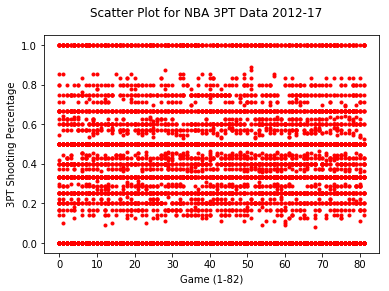

In [5]:
plt.plot(t,a.T, '.r')
plt.suptitle('Scatter Plot for NBA 3PT Data 2012-17')
plt.xlabel('Game (1-82)')
plt.ylabel('3PT Shooting Percentage')
plt.savefig('fulldata.png')
plt.show()

[[ -1.18501105e-03   1.68908697e-03   1.28929811e-03  -1.53567114e-03
    2.48691242e-04  -2.42161056e-04  -1.76444532e-03   1.26946812e-03
    3.01901372e-04   6.34353131e-04  -1.87623121e-04  -5.41713738e-03
    2.57071647e-05  -2.24050674e-04  -2.56103003e-04   1.06765272e-03
    1.81014573e-03   1.05036950e-03   8.01362632e-04   1.52381885e-04
   -2.14625439e-05  -2.66258530e-03  -1.23129918e-03  -7.62050914e-04
    1.33498765e-03  -2.29027764e-03  -3.04919407e-03  -3.92522937e-03
    7.49219099e-04   1.32598687e-03   3.72797423e-04   9.18797140e-04
    1.90843591e-03   1.61339123e-03  -9.46855171e-04   9.00218761e-04
    1.34430405e-03   3.47003189e-04   1.00183934e-03  -9.75707709e-04
   -2.51123736e-03   4.85138386e-03   1.96921017e-03  -1.35029005e-03
    6.25047616e-04   3.44939650e-03   6.70791567e-04   5.28836212e-04
    4.52628944e-04   4.16473482e-04   1.35149813e-03  -4.01900284e-04
   -2.25576561e-03   2.85296198e-03  -2.78571195e-03  -9.80072050e-04
   -2.38800187e-03  

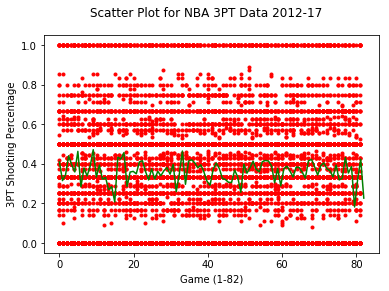

0.471745240522 0.181782629574


In [6]:
f = np.polyfit(t,a.T,1)
print(f) 
tf = np.linspace(0,82,100)
y = f[0]*tf + f[1]
plt.plot(t,a.T, '.r',tf,y, 'g')
plt.suptitle('Scatter Plot for NBA 3PT Data 2012-17')
plt.xlabel('Game (1-82)')
plt.ylabel('3PT Shooting Percentage')
plt.savefig('full-lsr.png')
plt.show()
print(max(y),min(y))

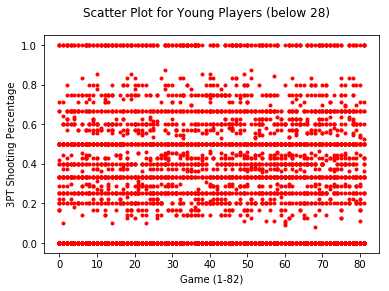

In [7]:
young = a[[2,3,4,6,7,8,9,19,20,22,23,25,26,28,31,33,34,35,36,39,41,42,43,45,46,47,48,50,51,53,54,55,59,62,65,66,67,68,69,70,71,
          74,77,79,82,83,86,91,97,98,99],:]
plt.plot(t,young.T, '.r')
plt.suptitle('Scatter Plot for Young Players (below 28)')
plt.xlabel('Game (1-82)')
plt.ylabel('3PT Shooting Percentage')
plt.savefig('youngdata.png')
plt.show()

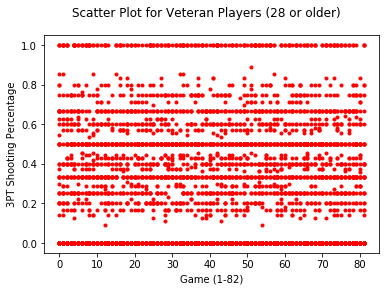

In [8]:
veteran = np.delete(a,[2,3,4,6,7,8,9,19,20,22,23,25,26,28,31,33,34,35,36,39,41,42,43,45,46,47,48,50,51,53,54,55,59,62,65,66,67,
                       68,69,70,71,74,77,79,82,83,86,91,97,98,99],0)
plt.plot(t,veteran.T, '.r')
plt.suptitle('Scatter Plot for Veteran Players (28 or older)')
plt.xlabel('Game (1-82)')
plt.ylabel('3PT Shooting Percentage')
plt.savefig('veterandata.png')
plt.show()

[[  1.28929811e-03   1.26946812e-03   6.34353131e-04  -1.23129918e-03
   -3.04919407e-03   7.49219099e-04   1.61339123e-03   9.00218761e-04
    1.34430405e-03   4.85138386e-03   1.96921017e-03  -1.35029005e-03
    6.70791567e-04   5.28836212e-04   4.52628944e-04   3.72024684e-04
    1.50142032e-03   1.73583222e-04   1.42880465e-04   1.02756827e-03
    3.02108162e-04   1.37471294e-04]
 [  3.42734646e-01   2.76830444e-01   3.34076991e-01   3.08123714e-01
    4.74992360e-01   3.44400529e-01   2.96047899e-01   3.54967969e-01
    3.07482515e-01   1.31860417e-01   3.44966500e-01   4.68589186e-01
    3.69406112e-01   3.38216280e-01   2.93936820e-01   3.90298854e-01
    3.33875404e-01   4.04201587e-01   2.96115780e-01   3.17822510e-01
    4.02057302e-01   3.95054364e-01]]


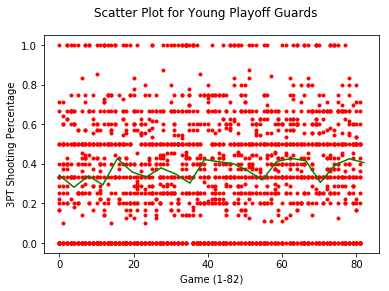

error =  123.723269028


In [9]:
ypg = a[[2,7,9,22,26,28,33,35,36,41,42,43,46,47,48,66,67,68,70,77,82,86],:]
f1,res1,_,_,_ = np.polyfit(t,ypg.T,1,full=True)
print(f1)
t1 = np.linspace(0,82,22)
y1 = f1[0]*t1 + f1[1]
plt.plot(t,ypg.T, '.r',t1,y1,'g')
plt.suptitle('Scatter Plot for Young Playoff Guards')
plt.xlabel('Game (1-82)')
plt.ylabel('3PT Shooting Percentage')
plt.savefig('ypgdata.png')
plt.show()
print("error = ",sum(res1))

[[ -2.42161056e-04  -5.41713738e-03   2.57071647e-05  -2.56103003e-04
    1.06765272e-03   1.05036950e-03  -2.66258530e-03   1.90843591e-03
    3.47003189e-04  -2.51123736e-03   6.25047616e-04  -2.25576561e-03
   -6.02376988e-04  -1.82179123e-03  -6.62585301e-04   2.27239582e-04
    3.49484660e-03   4.22350649e-04  -2.36889019e-03   5.31514677e-03
   -9.07521686e-04   4.65384574e-04]
 [  3.60100206e-01   5.21101381e-01   3.32666177e-01   3.25140464e-01
    3.18479577e-01   2.69764913e-01   5.03188363e-01   3.11476638e-01
    3.86739054e-01   5.47912430e-01   3.82783133e-01   4.73699971e-01
    3.96993829e-01   4.89172789e-01   4.47798119e-01   3.99906553e-01
    9.99221275e-02   3.34528945e-01   5.08940053e-01   2.19926535e-02
    4.24120482e-01   3.50005583e-01]]


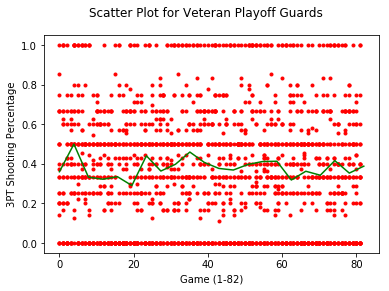

error =  145.616163817


In [10]:
vpg = a[[5,11,12,14,15,17,21,32,37,40,44,52,57,60,63,81,84,88,89,93,94,95],:]
f2,res2,_,_,_ = np.polyfit(t,vpg.T,1,full=True)
print(f2)
t2 = np.linspace(0,82,22)
y2 = f2[0]*t2 + f2[1]
plt.plot(t,vpg.T, '.r',t2,y2,'g')
plt.suptitle('Scatter Plot for Veteran Playoff Guards')
plt.xlabel('Game (1-82)')
plt.ylabel('3PT Shooting Percentage')
plt.savefig('vpgdata.png')
plt.show()
print("error = ",sum(res2))

[[ -1.76444532e-03  -2.14625439e-05  -2.29027764e-03   3.44939650e-03
   -5.37964323e-03   5.23873271e-04   1.60261643e-04   2.27140540e-03
    4.24135567e-05   6.40012625e-04]
 [  4.71911255e-01   4.24527770e-01   3.96963562e-01   2.50811637e-01
    5.18985307e-01   3.52929474e-01   3.50985013e-01   2.48873935e-01
    3.54221275e-01   2.69018513e-01]]


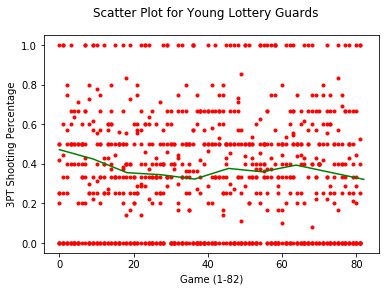

error =  67.2131811249


In [11]:
ylg = a[[6,20,25,45,59,62,65,74,79,97],:]
f3,res3,_,_,_ = np.polyfit(t,ylg.T,1,full=True)
print(f3)
t3 = np.linspace(0,82,10)
y3 = f3[0]*t3 + f3[1]
plt.plot(t,ylg.T, '.r',t3,y3,'g')
plt.suptitle('Scatter Plot for Young Lottery Guards')
plt.xlabel('Game (1-82)')
plt.ylabel('3PT Shooting Percentage')
plt.savefig('ylgdata.png')
plt.show()
print("error = ",sum(res3))

[[ 0.00080136  0.00133499 -0.00392523 -0.002388   -0.00215484]
 [ 0.19520335  0.33556715  0.50348398  0.41644578  0.47079547]]


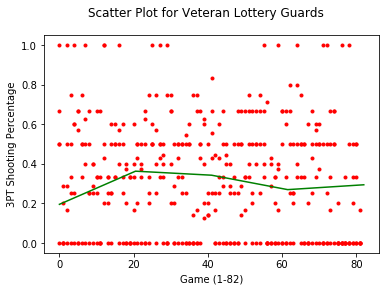

error =  28.8433451062


In [12]:
vlg = a[[18,24,27,56,80],:]
f4,res4,_,_,_ = np.polyfit(t,vlg.T,1,full=True)
print(f4)
t4 = np.linspace(0,82,5)
y4 = f4[0]*t4 + f4[1]
plt.plot(t,vlg.T, '.r',t4,y4,'g')
plt.suptitle('Scatter Plot for Veteran Lottery Guards')
plt.xlabel('Game (1-82)')
plt.ylabel('3PT Shooting Percentage')
plt.savefig('vlgdata.png')
plt.show()
print("error = ",sum(res4))

[[ -1.53567114e-03   2.48691242e-04   1.52381885e-04  -7.62050914e-04
   -9.46855171e-04   1.35149813e-03  -4.01900284e-04  -9.80072050e-04
    1.51565612e-04  -4.52433038e-05]
 [  4.44767852e-01   3.93976785e-01   4.31352924e-01   3.72960623e-01
    3.92201293e-01   3.16105789e-01   4.21142815e-01   3.51107552e-01
    3.74959154e-01   4.27673817e-01]]


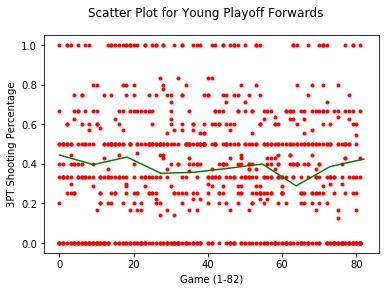

error =  67.4279334221


In [13]:
ypf = a[[3,4,19,23,34,50,51,55,83,98],:]
f5,res5,_,_,_ = np.polyfit(t,ypf.T,1,full=True)
print(f5)
t5 = np.linspace(0,82,10)
y5 = f5[0]*t5 + f5[1]
plt.plot(t,ypf.T, '.r',t5,y5,'g')
plt.suptitle('Scatter Plot for Young Playoff Forwards')
plt.xlabel('Game (1-82)')
plt.ylabel('3PT Shooting Percentage')
plt.savefig('ypfdata.png')
plt.show()
print("error = ",sum(res5))

[[  1.68908697e-03  -1.87623121e-04  -2.24050674e-04   3.72797423e-04
    1.00183934e-03   4.16473482e-04  -6.38575984e-04   5.62684342e-06
   -2.73128285e-03  -2.22407244e-04   3.23559822e-04   7.79519161e-04
    1.31476584e-03   1.08009273e-04   1.57138037e-04   3.68502737e-03
   -8.66087657e-04]
 [  3.13896856e-01   3.89610932e-01   3.95708199e-01   3.65035851e-01
    2.27596239e-01   2.74986483e-01   3.63679401e-01   3.52442845e-01
    5.17068175e-01   3.01702615e-01   3.43054364e-01   3.30734352e-01
    2.97434910e-01   3.67113429e-01   3.82221275e-01   4.70978548e-02
    2.50649721e-01]]


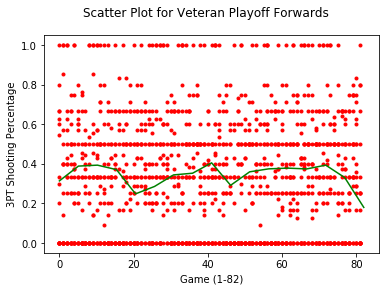

error =  107.912182647


In [14]:
vpf = a[[1,10,13,30,38,49,58,61,64,72,75,78,85,87,90,92,96,],:]
f6,res6,_,_,_ = np.polyfit(t,vpf.T,1,full=True)
print(f6)
t6 = np.linspace(0,82,17)
y6 = f6[0]*t6 + f6[1]
plt.plot(t,vpf.T, '.r',t6,y6,'g')
plt.suptitle('Scatter Plot for Veteran Playoff Forwards')
plt.xlabel('Game (1-82)')
plt.ylabel('3PT Shooting Percentage')
plt.savefig('vpfdata.png')
plt.show()
print("error = ",sum(res6))

[[  3.01901372e-04   9.18797140e-04  -9.75707709e-04   2.85296198e-03
   -2.78571195e-03   6.93364243e-04  -1.14177033e-03]
 [  3.76858360e-01   2.99154569e-01   3.80552748e-01   2.01711137e-01
    4.45065237e-01   3.35833382e-01   4.04522186e-01]]


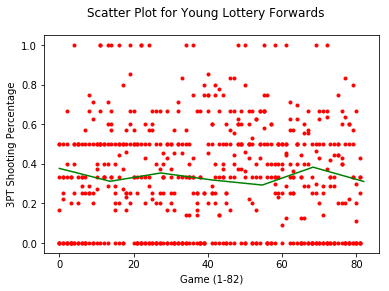

error =  38.7555060251


In [15]:
ylf = a[[8,31,39,53,54,71,91],:]
f7,res7,_,_,_ = np.polyfit(t,ylf.T,1,full=True)
print(f7)
t7 = np.linspace(0,82,7)
y7 = f7[0]*t7 + f7[1]
plt.plot(t,ylf.T, '.r',t7,y7,'g')
plt.suptitle('Scatter Plot for Young Lottery Forwards')
plt.xlabel('Game (1-82)')
plt.ylabel('3PT Shooting Percentage')
plt.savefig('ylfdata.png')
plt.show()
print("error = ",sum(res7))

[[ 0.00132599 -0.0006417  -0.00050476 -0.00153381]
 [ 0.28672436  0.41369615  0.36554041  0.35246077]]


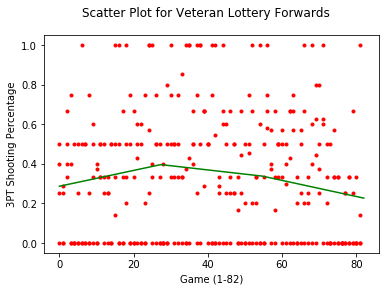

error =  30.3528476047


In [16]:
vlf = a[[29,73,76,99],:]
f8,res8,_,_,_ = np.polyfit(t,vlf.T,1,full=True)
print(f8)
t8 = np.linspace(0,82,4)
y8 = f8[0]*t8 + f8[1]
plt.plot(t,vlf.T, '.r',t8,y8,'g')
plt.suptitle('Scatter Plot for Veteran Lottery Forwards')
plt.xlabel('Game (1-82)')
plt.ylabel('3PT Shooting Percentage')
plt.savefig('vlfdata.png')
plt.show()
print("error = ",sum(res8))

In [17]:
print(np.mean(y1))
print(np.mean(y2))
print(np.mean(y3))
print(np.mean(y4))
print(np.mean(y5))
print(np.mean(y6))
print(np.mean(y7))
print(np.mean(y8))

0.368800556913
0.379883636683
0.3728587649
0.292873891229
0.386038257214
0.340245031057
0.335432249582
0.311878960286


In [35]:
ypg_scale = preprocessing.scale(ypg)
a_scale = preprocessing.scale(a.T)

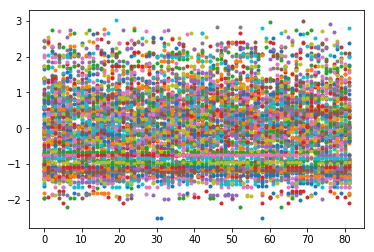

NormaltestResult(statistic=masked_array(data = [4.314713424114353 4.235290808846323 8.063860519292025 1.6148866399281585
 2.481875990187786 2.3666266245310457 2.9799962941513587 9.221899359711765
 1.3621086155188915 1.6804949315454685 1.5726656926365554
 3.7825296031618056 10.15761750054041 0.5452063638760901 3.8419848356846127
 2.2575674435389796 8.578140682299772 5.603610451774679 14.395889574886093
 0.8784653532411241 3.4534977248299215 8.4882179637293 7.448732172004131
 7.760572623900455 0.2171935586238944 9.323931354115038 9.337368873007538
 3.9348411970908668 1.110518480848693 6.740009941092867 0.6007735024337345
 1.1422315538008712 6.338571624568018 5.317175044411574 5.05324956584438
 0.4236405177144723 0.25001769827065207 3.726355092634665 7.541234709444705
 0.9864815805411951 1.1096176071283845 7.652422742898007
 0.05751887693686865 7.178979401314553e-05 0.2453149518337209
 3.72706236246196 0.9680977466694207 2.215013347229583 6.404482008954548
 5.44943529767474 6.460364131722

In [39]:
plt.plot(t,a_scale,'.')
plt.savefig('pseudonormal.png')
plt.show()
print(sp.stats.mstats.normaltest(a_scale))

In [22]:
a_scale.mean(axis=0)

array([  2.70894418e-16,   1.22124533e-16,   2.93098879e-16,
         2.19824159e-16,   6.66133815e-17,  -7.54951657e-17,
         6.12843110e-16,   6.31161789e-16,  -2.93098879e-16,
        -1.05471187e-16,   5.90152927e-17,  -2.05391260e-16,
         5.20972154e-16,   9.10382880e-17,   1.37667655e-16,
         2.46677678e-17,   9.76996262e-17,  -3.50830476e-16,
        -5.27355937e-17,  -1.85407245e-16,   4.88498131e-16,
         2.02060590e-16,   8.43769499e-17,  -1.68753900e-16,
        -2.21489493e-16,  -1.68753900e-16,   3.99680289e-16,
         7.32747196e-16,   1.02140518e-16,   2.08721929e-16,
        -2.93098879e-16,  -1.79856130e-16,  -6.21724894e-17,
         6.81676937e-16,  -6.66133815e-17,   2.66453526e-17,
        -4.18554080e-16,   2.22044605e-16,   4.44089210e-18,
        -1.33226763e-16,  -2.06501483e-16,   1.95399252e-16,
        -4.52970994e-16,  -3.55271368e-17,   2.26485497e-16,
        -2.95319325e-16,  -8.88178420e-18,   4.88498131e-17,
         1.31006317e-16,

In [23]:
a_scale.std(axis=0)

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.])